# Summary
In this notebook, a Network Intrusion Detection System (NIDS) was developed using Logistic Regression and Artificial Neural Networks to carry out predictions on the class (Normal or Anomaly). The dataset was initially loaded, and exploratory data analysis was performed to better understand the distribution of the data. The ANN model outperformed the logistic regression model.
The model achieved an accuracy of 98%, correctly predicting that 97% of the instances classified as normal were indeed normal, and 100% of the instances predicted as class 1 were actually class 1. The model was then saved for future use.

# Data Exploration

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv("/kaggle/input/network-intrusion-detection/Train_data.csv")
test_df = pd.read_csv("/kaggle/input/network-intrusion-detection/Test_data.csv")

In [3]:
# Set options to display more rows and columns
pd.set_option('display.max_rows', None)  # Show all rows (or specify a number)
pd.set_option('display.max_columns', None)  # Show all columns (or specify a number)

In [4]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [8]:
# Checking for null values in training set
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [9]:
# Checking for null values in test set
test_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

There are no null values present in the training and test set.

In [10]:
train_df.duplicated().values.any()

False

In [11]:
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Partial Conclusion**
The dataset is clean and void of duplicates. I went forth to visualize and conduct more exploratory data  analysis so as to have a better idea of the distribution of the dataset.

# Exploratory Data Analysis

Here, we explore the relationships between the different numerical and categorical features with the target variable (class).

**Categorical Features**

In [12]:
# Selecting categorical features
cat_features = train_df.select_dtypes(include = 'object')

In [13]:
cat_features.columns

Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')

<Axes: xlabel='class', ylabel='count'>

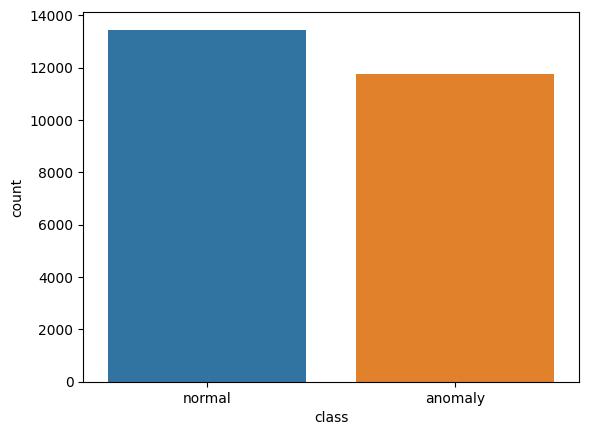

In [14]:
# Visualizing the Target Variable Class
sns.countplot(data = train_df, x = 'class')

It could be concluded from the resulting bar chart that, the number of the different class instances in our target variable is fairly balanced which further goes on to mean that accuracy could be used as a performance metrics. However despite the fact that accuracy could be as a performance metrics, key performance metrics like precision,recall, f1 score would provide a better explanation to 

In [15]:
train_df['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

Hence, we have 13449  normal instances compared to 11743 anomaly instances. Based on this, the target variable is somewhat balanced as there is not a significantly big difference between the two classes.

<Axes: xlabel='protocol_type', ylabel='count'>

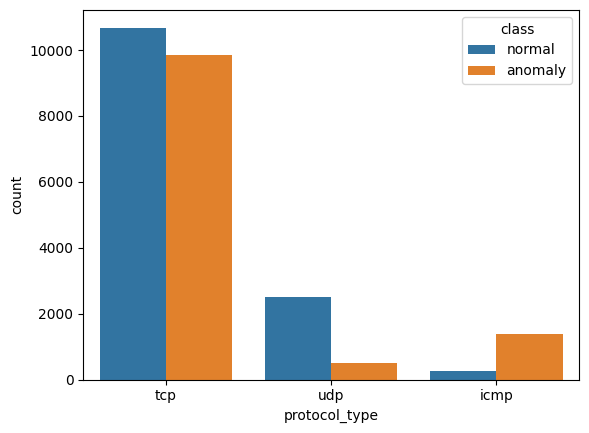

In [16]:
# train_df['protocol_type'].unique()

sns.countplot(data = train_df, x ='protocol_type', hue = 'class')

Overall, there are more normal class instances present in the tcp and udp of the prototype column as compared to anomalies.However, the difference between the number of class instances that are tcp are significantly closed as compared to udp and icmp protocols.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 [Text(0, 0, 'ftp_data'),
  Text(1, 0, 'other'),
  Text(2, 0, 'private'),
  Text(3, 0, 'http'),
  Text(4, 0, 'remote_job'),
  Text(5, 0, 'name'),
  Text(6, 0, 'netbios_ns'),
  Text(7, 0, 'eco_i'),
  Text(8, 0, 'mtp'),
  Text(9, 0, 'telnet'),
  Text(10, 0, 'finger'),
  Text(11, 0, 'domain_u'),
  Text(12, 0, 'supdup'),
  Text(13, 0, 'uucp_path'),
  Text(14, 0, 'Z39_50'),
  Text(15, 0, 'smtp'),
  Text(16, 0, 'csnet_ns'),
  Text(17, 0, 'uucp'),
  Text(18, 0, 'netbios_dgm'),
  Text(19, 0, 'urp_i'),
  Text(20, 0, 'auth'),
  Text(21, 0, 'domain'),
  Text(22, 0, 'ftp'),
  Text(23, 0, 'bgp'),
  Text(24, 0, 'ldap'),
  Text(25, 0, 'ecr_i'),
  Text(26, 0, 'gopher'),
  Text(27, 0, 'vmnet'),
  Text(28, 0, '

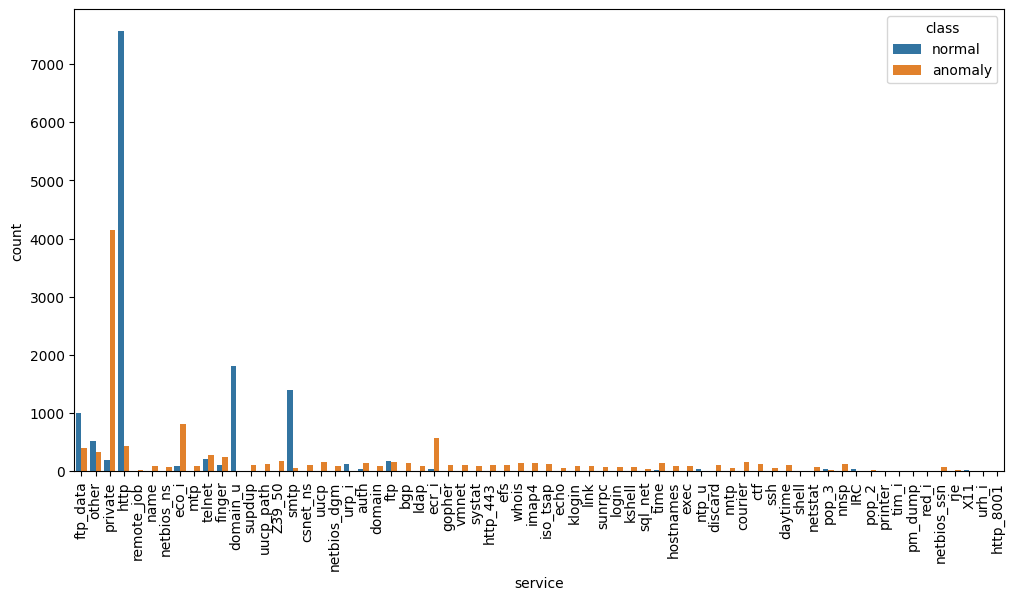

In [17]:
plt.figure(figsize = (12,6))
sns.countplot(data = train_df, x = 'service', hue = 'class')
plt.xticks(rotation = 90)

<Axes: xlabel='flag', ylabel='count'>

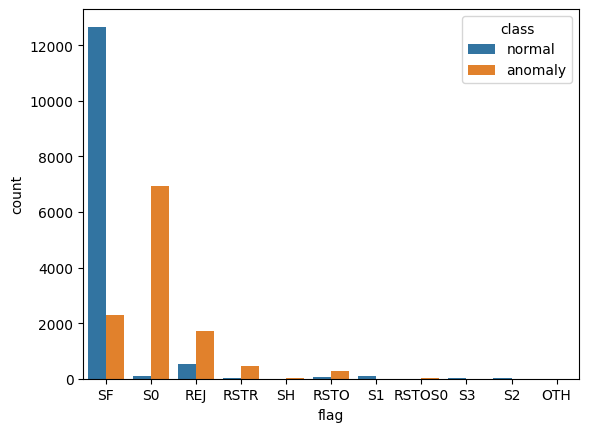

In [18]:
sns.countplot(data = train_df, x = 'flag', hue = 'class')

**Numerical Features**

In [19]:
# Mapping Target Variable 0 for normal and 1 for anomaly
labels ={'normal':0,'anomaly':1}
train_df['labels'] = train_df['class'].map(labels)

In [20]:
train_df[['class','labels']].head()

,class,labels
0,normal,0
1,normal,0
2,anomaly,1
3,normal,0
4,normal,0


In [21]:
num_features = train_df.select_dtypes(include = ['int64','float64'])

In [22]:
num_features.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [23]:
num_features.corr()['labels'].sort_values()

same_srv_rate                 -0.749237
dst_host_srv_count            -0.719292
dst_host_same_srv_rate        -0.692212
logged_in                     -0.688084
srv_diff_host_rate            -0.120649
is_guest_login                -0.038662
num_access_files              -0.036999
su_attempted                  -0.025851
num_root                      -0.019753
num_compromised               -0.018620
root_shell                    -0.018579
num_file_creations            -0.018322
num_shells                    -0.013454
hot                           -0.012839
dst_bytes                     -0.010949
num_failed_logins              0.000028
land                           0.000605
srv_count                      0.002370
src_bytes                      0.005743
urgent                         0.006743
duration                       0.050901
dst_host_srv_diff_host_rate    0.062928
dst_host_same_src_port_rate    0.092974
wrong_fragment                 0.097625
diff_srv_rate                  0.193528


<Axes: >

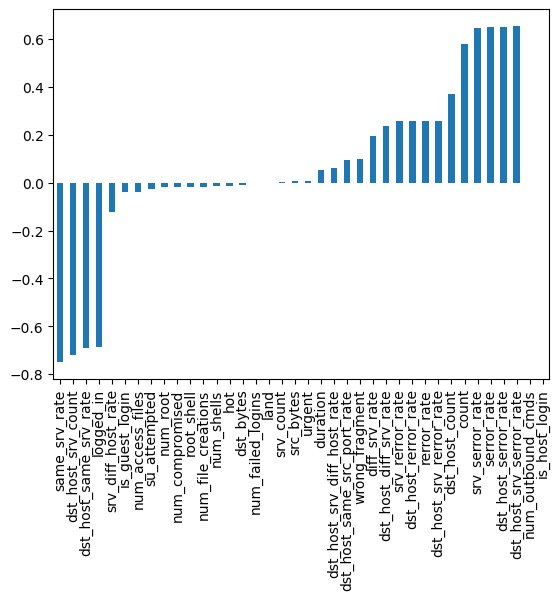

In [24]:
num_features.corr()['labels'].drop('labels').sort_values().plot(kind ='bar')

A strong negative correlation of -0.749 suggests a strong inverse relationship between the 'same_srv_rate' column and the target variable ('label') which indicates that as the values of 'same_srv_rate' increase, the likelihood of the target variable being classified as anomaly decreases. Conversely, lower values of same_srv_rate are associated with a higher likelihood of being classified as anomaly.
On the other-hand , a fairly strong positive correlation of 0.65 between the 'dst_host_srv_serror_rate' and the target variable suggests that as the value of 'dst_host_srv_serror_rate' increases, the likelihood of the target variable being classified as anomaly increases as well.  

<Axes: >

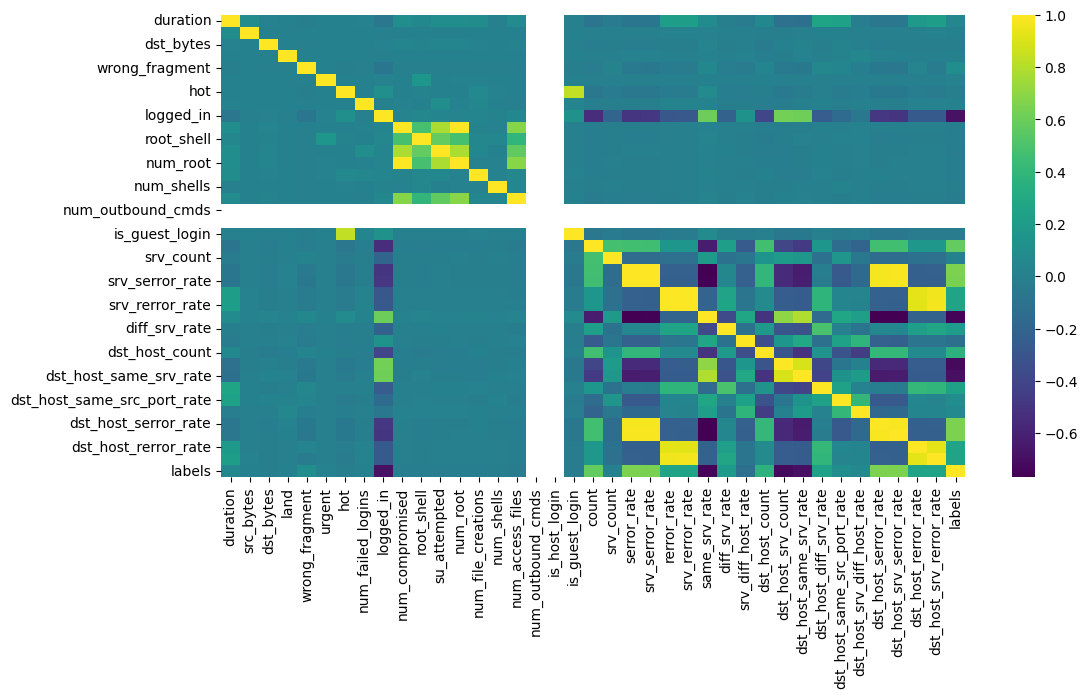

In [25]:
plt.figure(figsize = (12, 6))
sns.heatmap(data = num_features.corr(), cmap = 'viridis')

In [26]:
# Calculating the correlation matrix
correlation_matrix = num_features.corr()

# Setting threshold for strong correlation
threshold = 0.90

# Finding pairs of correlated features
strong_correlations = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            strong_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Convert to DataFrame for better readability
strong_correlations_df = pd.DataFrame(strong_correlations, columns=['Feature 1', 'Feature 2', 'Correlation Coefficient'])

strong_correlations_df


,Feature 1,Feature 2,Correlation Coefficient
0,num_root,num_compromised,0.998956
1,srv_serror_rate,serror_rate,0.993290
2,srv_rerror_rate,rerror_rate,0.989134
3,dst_host_serror_rate,serror_rate,0.978022
4,dst_host_serror_rate,srv_serror_rate,0.976363
5,dst_host_srv_serror_rate,serror_rate,0.979602
6,dst_host_srv_serror_rate,srv_serror_rate,0.984621
7,dst_host_srv_serror_rate,dst_host_serror_rate,0.984706
8,dst_host_rerror_rate,rerror_rate,0.928992
9,dst_host_rerror_rate,srv_rerror_rate,0.919537


In [27]:
strong_correlations_list = list(strong_correlations_df['Feature 1'])

In [28]:
strong_correlations_list

['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_rerror_rate']

In [29]:
train_df.shape

(25192, 43)

In [30]:
train_df = train_df.drop(strong_correlations_list, axis = 1)

In [31]:
train_df['service'].nunique()

66

The service column has alot of unique values that might seem irrelavant to our model. So I went ahead to drop it as well.

In [32]:
train_df = train_df.drop('service', axis = 1)

In [33]:
train_df.shape

(25192, 35)

In [34]:
test_df.shape

(22544, 41)

In [35]:
test_df = test_df.drop(strong_correlations_list, axis = 1)

In [36]:
test_df = test_df.drop('service', axis = 1)

In [37]:
test_df.shape

(22544, 33)

In [38]:
missing_columns = train_df.columns[~train_df.columns.isin(test_df.columns)]
missing_columns_list = missing_columns.tolist()
print(missing_columns_list)

['class', 'labels']


# Feature Engineering

Since the values in the class column were mapped earlier to form the values we see in the labels column, I went forth to drop it

In [39]:
train_df = train_df.drop('class', axis = 1)

In [40]:
cat_features.columns

Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')

In [41]:
train_dummies = pd.get_dummies(train_df[['protocol_type','flag']], drop_first=True )

In [42]:
train_df.drop(['protocol_type','flag'], axis =1, inplace = True)

train_df = pd.concat([train_df, train_dummies], axis =1)

In [43]:
train_df.shape

(25192, 44)

In [44]:
test_dummies = pd.get_dummies(test_df[['protocol_type','flag']], drop_first=True )

In [45]:
test_df.drop(['protocol_type','flag'], axis =1, inplace = True)

test_df = pd.concat([test_df, test_dummies], axis = 1)

# Model Development

In [46]:
# Baseline Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

## 1. Logistic Regression

In [47]:
log_model = LogisticRegression()

The choice of the scaler used here is as a result of the fact that our features are not normally distributed and hence the MinMax Scaler is used here so as to preserve the relationships between the data points.

In [48]:
scaler = MinMaxScaler()

In [49]:
X = train_df.drop('labels', axis = 1)

In [50]:
y = train_df['labels']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
X_train = scaler.fit_transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

In [54]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [55]:
predictions = log_model.predict(X_test)

In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4057
           1       0.96      0.94      0.95      3501

    accuracy                           0.96      7558
   macro avg       0.96      0.95      0.95      7558
weighted avg       0.96      0.96      0.96      7558



## 2. Artificial Neural Networks (ANN)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
ann_model = Sequential()

ann_model.add(Dense(64, activation = 'relu',input_shape=(X_train.shape[1],)))
ann_model.add(Dropout(0.5))

ann_model.add(Dense(32, activation = 'relu'))
ann_model.add(Dropout(0.5))

# For Binary Classification
ann_model.add(Dense(1, activation = 'sigmoid'))

ann_model.compile(loss = 'binary_crossentropy', optimizer ='adam')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)

In [60]:
ann_model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 50, callbacks = [early_stop])

Epoch 1/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3295 - val_loss: 0.1052
Epoch 2/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1217 - val_loss: 0.0921
Epoch 3/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1213 - val_loss: 0.0865
Epoch 4/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0991 - val_loss: 0.0797
Epoch 5/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0964 - val_loss: 0.0763
Epoch 6/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0851 - val_loss: 0.0715
Epoch 7/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0808 - val_loss: 0.0691
Epoch 8/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0767 - val_loss: 0.0654
Epoch 9/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0747 - val_loss: 0.0630
Epoch 10/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0726 - val_loss: 0.0621
Epoch 11/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0684 - val_loss: 0.0637
Epoch 12/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

The training process was stopped early at epoch 40, indicating that there might have been no significant improvement in validation loss beyond this point. This was done so as to prevent the model from overfitting.

In [61]:
loss = pd.DataFrame(ann_model.history.history)

<Axes: >

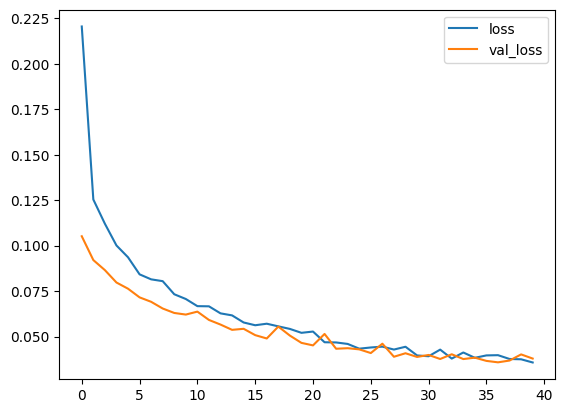

In [62]:
loss.plot()

By looking at the plot of loss and val_loss, we see no signs of overfitting hence, our model is actually performing well.

In [63]:
y_pred_proba = ann_model.predict(X_test)
y_pred = (y_pred_proba > 0.8).astype(int)  # Adjust threshold as needed

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


As per the above code, the logic here is, if the predicted probability of an instance being an anomaly exceeds 0.8 i.e to say if we are more than 80% certain that the predicted probability is an anomaly, then, it is classified as an anomaly (1); otherwise, if the probability is 0.8 or lower, it is classified as normal behavior (0).

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4057
           1       1.00      0.97      0.98      3501

    accuracy                           0.98      7558
   macro avg       0.99      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558



**Explanation**

**Precision:** It is defined as the ratio of true positives to the total number of predicted positives.
* For class 0, we have a Precision  = 0.97 which means, 97% of the instances predicted as class 0 were actually class 0.
* For class 1: Precision = 1.00 (100% of the instances predicted as class 1 were actually class 1).

* Class 0 has 4,057 instances.
* Class 1 has 3,501 instances.

**Accuracy:** The overall accuracy of the model is 0.98, meaning it correctly classified 98% of all instances (7,558 total).   7558

# Model Comparison

<Figure size 1200x600 with 0 Axes>

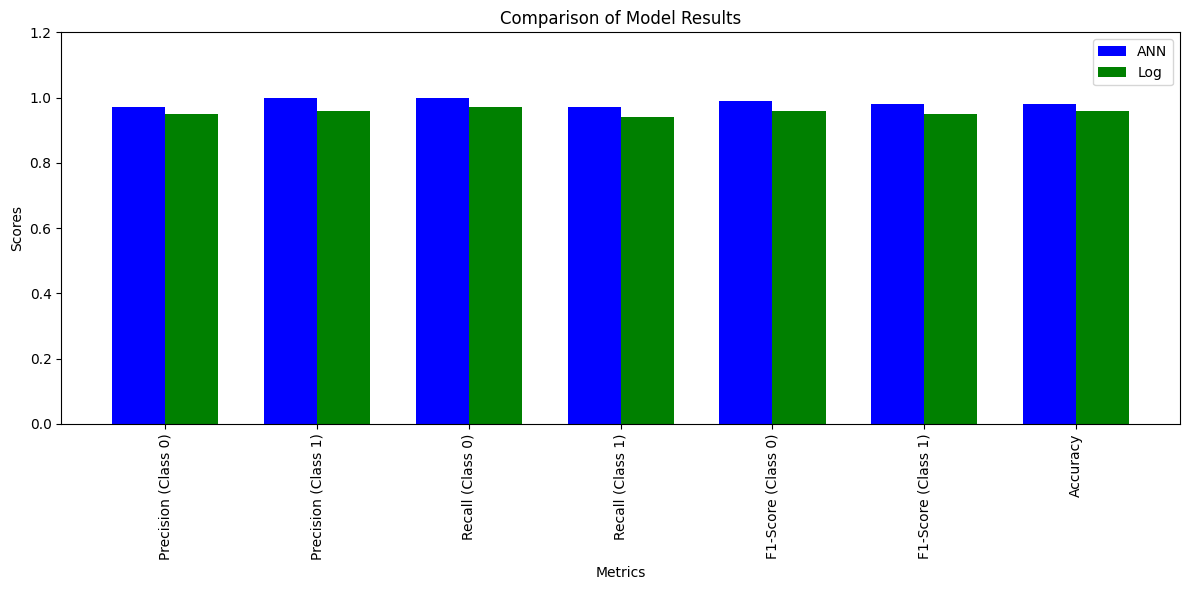

In [80]:
plt.figure(figsize =(12,6))
metrics = ['Precision (Class 0)', 'Precision (Class 1)', 'Recall (Class 0)', 'Recall (Class 1)', 'F1-Score (Class 0)', 'F1-Score (Class 1)', 'Accuracy']
ann_result = [0.97, 1.00, 1.00, 0.97, 0.99, 0.98, 0.98] 
log_result = [0.95, 0.96, 0.97, 0.94, 0.96, 0.95, 0.96] 

# Create bar positions
bar_width = 0.35
index = np.arange(len(metrics))

# Create the bar chart
fig, ax = plt.subplots(figsize =(12,6))

# Plot bars for each set
bars1 = ax.bar(index, ann_result, bar_width, label='ANN', color='b')
bars2 = ax.bar(index + bar_width, log_result, bar_width, label='Log', color='g')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Results')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics, rotation = 90)
ax.legend()

plt.ylim(0, 1.2)  # Setting y-axis limits to [0, 1.5] for better visibility
plt.tight_layout()


# Conclusion
Based on the overall performances of the two models, the ANN model performed better so I went forth to use it in the test dataset.

# Testing Model Performance on New Data

# Selected Model : ANN Model

In [66]:
X_train = train_df.drop('labels', axis = 1).values
y_train = train_df['labels'].values

In [67]:
X_test = test_df.values

In [68]:
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Add input shape
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))  # For binary classification


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks = [early_stop]) 

Epoch 1/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8615 - loss: 0.3328 - val_accuracy: 0.9569 - val_loss: 0.1146
Epoch 2/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9597 - loss: 0.1315 - val_accuracy: 0.9637 - val_loss: 0.0963
Epoch 3/50
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9649 - loss: 0.1121 - val_accuracy: 0.9669 - val_loss: 0.0853
Epoch 3: early stopping


In [72]:
test_proba = ann_model.predict(X_test)
test_predictions = (test_proba > 0.8).astype(int)

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [73]:
test_predictions

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [74]:
predictions_df = pd.DataFrame(test_predictions, columns = ['Predicted_Labels'])

In [75]:
predictions_df.to_csv('predictions.csv', index = False)

In [76]:
predictions_df.head()

,Predicted_Labels
0,1
1,1
2,0
3,1
4,0


In [77]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789 (57.77 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,860 (38.52 KB)

# Saving the Model

In [78]:
model.save("my_model_IntrusionEye.h5")

In [79]:
# Saving fpr future use
import shutil
shutil.move('my_model_IntrusionEye.h5', '/kaggle/working/my_model_IntrusionEye.h5')

'/kaggle/working/my_model_IntrusionEye.h5'